# **PyTorch Computer Vision**

## 0. Computer Vision libraries in Python 
* `torchvision` : base domain library for PyTorch CV 
* `torchvision.datasets` : get datasets and data loading functions for CV 
* `torchvision.models` : get pretrained CV models we can leverage for new problems 
* `torchvision.transform` : functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` : base dataset class for PyTorch 
* `torch.utils.data.DataLoader` : creates a python iterable over a dataset 

In [1]:
import torch 
from torch import nn 

import torchvision 
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt 

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset : Fashion MNIST  

In [2]:
# setup training data 
from torchvision import datasets 
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True,  # do we want the training dataset?
    download=True, # do we want to download it?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform=None # how do we want to transform the label 
)

test_data = datasets.FashionMNIST(
    root="data", 
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.77MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 60.6MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.69MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx 
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
print(f"Image shape: {image.shape} -> [color_cannels, height, width]")
print(f"image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_cannels, height, width]
image label: Ankle boot


### 1.2 Visualizing data

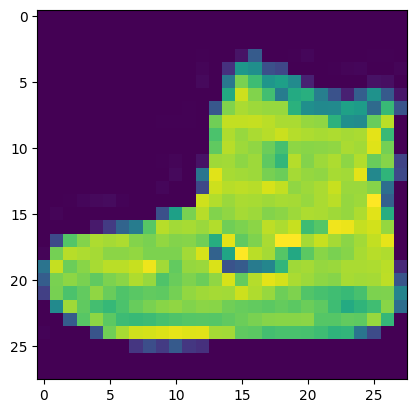

In [8]:
import matplotlib.pyplot as plt 

image, label = train_data[0]
plt.imshow(image.squeeze()) # we need squeeze to remove the color channel dimension

(-0.5, 27.5, 27.5, -0.5)

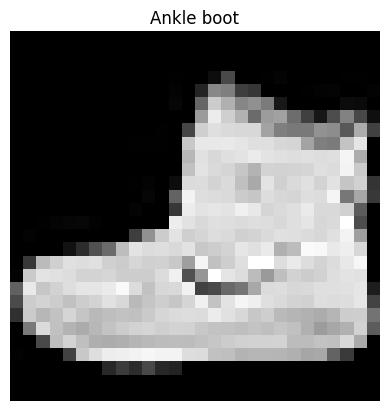

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

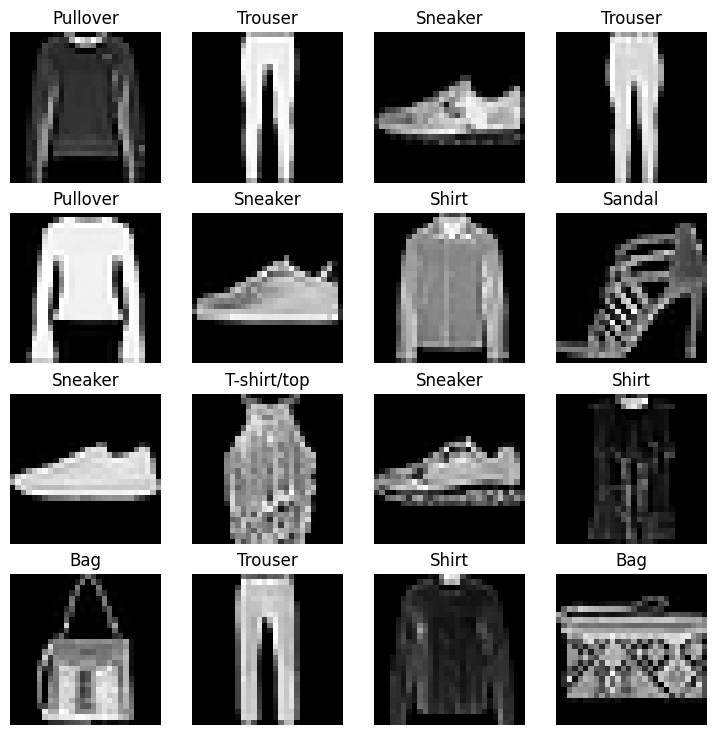

In [10]:
# plot more images 
# torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4 
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)